In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

def getdist(file):
    md = open(file,'r')
    md = md.readlines()
    dhh = []
    for i in range(len(md)):
        if 'MD' in md[i]:
            x1 = float(md[i+1].strip().split()[1])
            y1 = float(md[i+1].strip().split()[2])
            z1 = float(md[i+1].strip().split()[3])
            
            x2 = float(md[i+2].strip().split()[1])
            y2 = float(md[i+2].strip().split()[2])
            z2 = float(md[i+2].strip().split()[3])
            d = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
            dhh.append(d)
    return np.array(dhh)

Calculate the frecuency of vibration of H2 starting from a nuclear distance of 1 A (equilibrium distance is 0.68 A).

In [82]:
os.chdir('/home/fbonafe/dftb+/src/prg_dftb/test_md')
dhh_bomd = getdist('geo_end.xyz')
time_bo = np.linspace(0,128000,32001) * 0.024189

(0.58124902375584742, 1.0000140684029388)

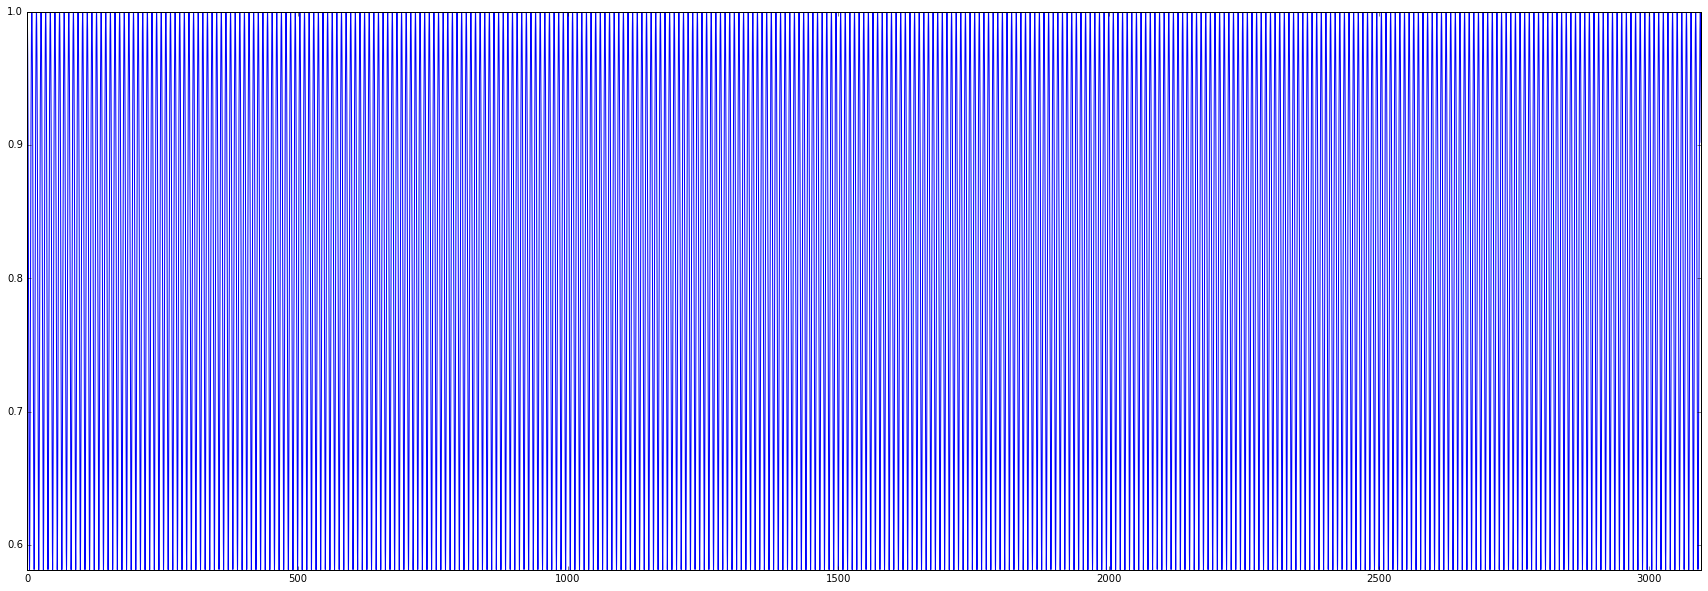

In [275]:
fig = plt.figure(figsize=(30,10))
plt.plot(time_bo,dhh_bomd)
plt.xlim(0,time_bo.max())
plt.ylim(dhh_bomd.min(),dhh_bomd.max())

No damping is oberved.

Calculate the frequency from time dependant propagation of both ions and electrons. In this case we have 'turned off' the contribution of the nucleii velocities in the update of the density matriz.

In [85]:
os.chdir('/home/fbonafe/dftb+/src/prg_dftb/test_dyn')
dhh_elec = getdist('tdcoords.xyz')
time_el = np.linspace(0,128000,32001) * 0.024189

(0.57359013999999997, 0.99999919999999998)

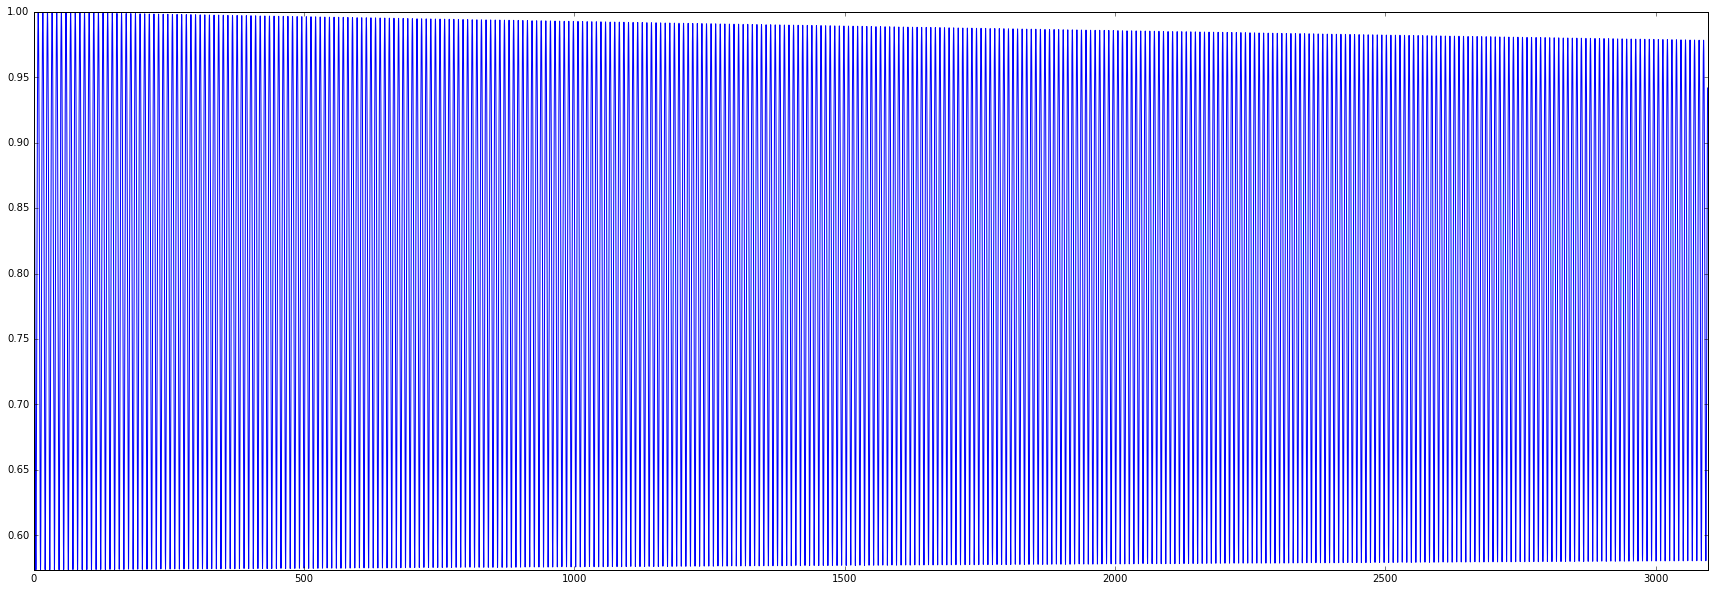

In [274]:
fig = plt.figure(figsize=(30,10))
plt.plot(time_el, dhh_elec)
plt.xlim(0,time_el.max())
plt.ylim(dhh_elec.min(),dhh_elec.max())

The damping appears to be asymmetric.

Comparison between the trajectories

(0.57359013999999997, 1.0000140684029388)

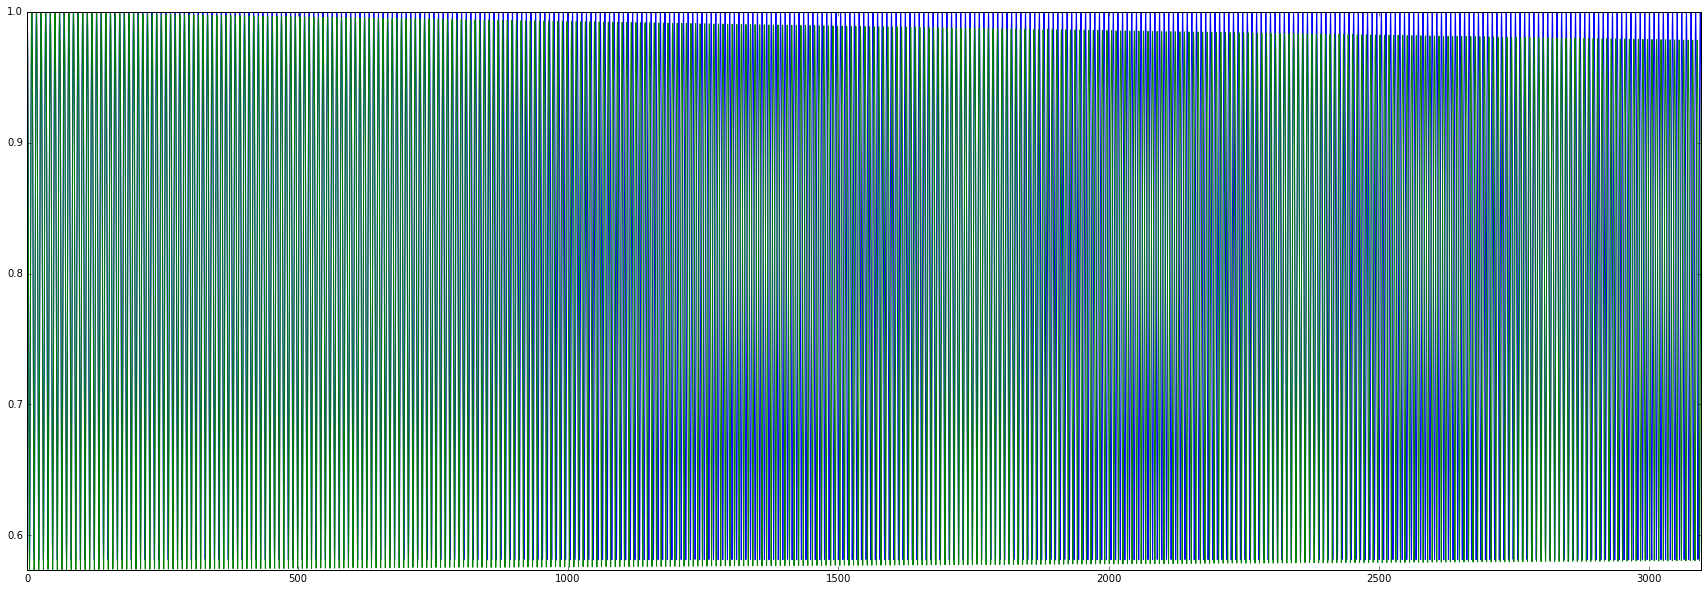

In [276]:
fig = plt.figure(figsize=(30,10))
plt.plot(time_bo,dhh_bomd,time_el,dhh_elec)
plt.xlim(0,time_bo.max())
plt.ylim(min(dhh_elec.min(),dhh_bomd.min()),max(dhh_elec.max(),dhh_bomd.max()))

Difference of the two runs

(0, 3096.192)

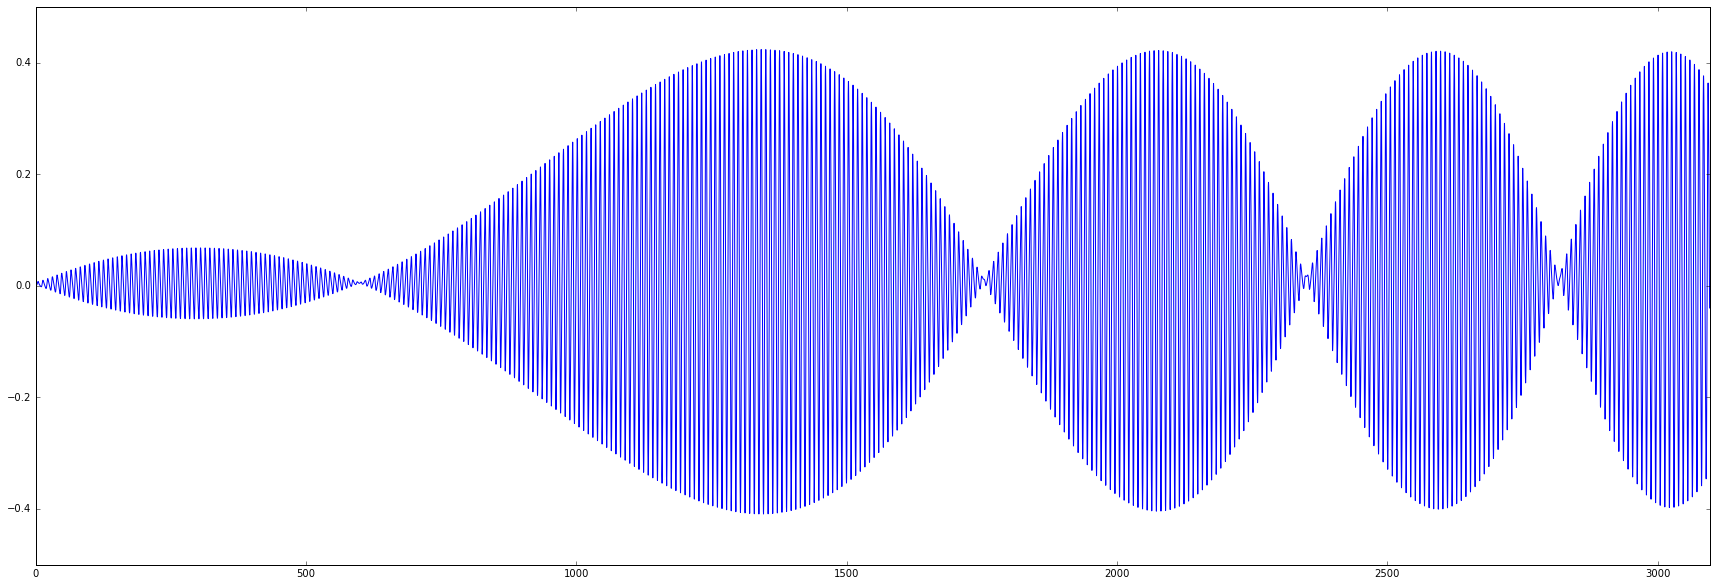

In [94]:
fig = plt.figure(figsize=(30,10))
plt.plot(time_bo,dhh_bomd-dhh_elec)
plt.xlim(0,time_bo.max())

In [95]:
from scipy.optimize import curve_fit

def osc(x,omega,amp,d0):
    return amp * np.cos(omega*x) + d0

def dampedosc(x,omega,amp,d0,damp):
    return amp * np.cos(omega*x) * np.exp(-x/damp) + d0

Fitting MD run with regular oscillator $$f(t) = A \sin(\omega)t$$

In [129]:
posc_opt, posc_cov = curve_fit(osc, time_bo, dhh_bomd, p0=[0.7349541, 0.206830687, 0.81683992])

In [130]:
omega_bo = posc_opt[0]
amp_bo = posc_opt[1]
d0_bo = posc_opt[2]
dhh_bo_fit = osc(time_bo,omega_bo,amp_bo,d0_bo)

[ 0.73501582  0.20572716  0.81674901]


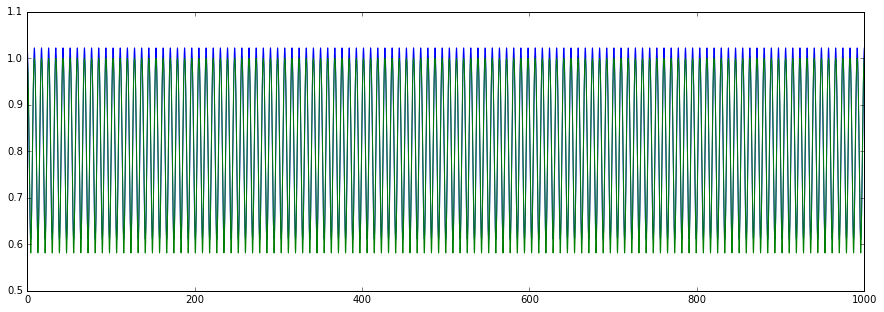

In [255]:
plt.figure(figsize=(15,5))
plt.plot(time_bo,dhh_bo_fit,time_bo,dhh_bomd)
plt.xlim(0.,1000)
print(posc_opt)

The best fit is achieved with $\omega = 0.7350 \mathrm{fs}^{-1}$

Fitting of the Ehrenfest run with damped oscilator $$f(t)=A\sin(\omega t)\exp(-t/t_d)$$

In [245]:
init_guess = [0.7351, 0.25, 0.816, 2.07367e4]
poscd_opt, poscd_cov = curve_fit(dampedosc, time_el[:8000], dhh_elec[:8000], p0=init_guess)

In [246]:
omega_el = poscd_opt[0]
amp_el = poscd_opt[1]
d0_el = poscd_opt[2]
damp_el = poscd_opt[3]
dhh_el_fit = dampedosc(time_el,omega_el,amp_el,d0_el,damp_el)

[  7.34954099e-01   2.06811061e-01   8.12319300e-01   2.07412638e+04]


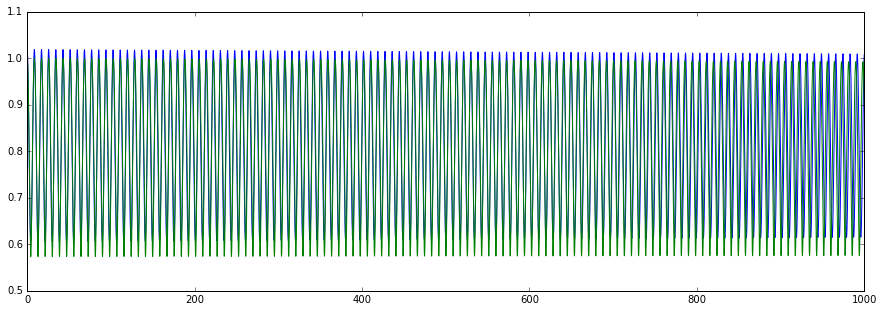

In [254]:
plt.figure(figsize=(15,5))
plt.plot(time_el,dhh_el_fit,time_el,dhh_elec)
plt.xlim(0,1000)
print(poscd_opt)

The best fit is achieved with $\omega = 0.73495 \mathrm{fs}^{-1}$ and $t_d = 2.\times 10^4$ fs (decay can be neglected)

Neclecting decay (fitting with standard sin function)

In [267]:
pel_opt, pel_cov = curve_fit(osc, time_el[0:8000], dhh_elec[0:8000], p0=[0.7349, 0.206811, 0.8123193])

In [268]:
omega_el = pel_opt[0]
amp_el = pel_opt[1]
#phase_bo = posc_opt[2]
d0_el = pel_opt[2]
dhh_el2_fit = osc(time_el,omega_el,amp_el,d0_el)

[ 0.73495756  0.20299866  0.812322  ]


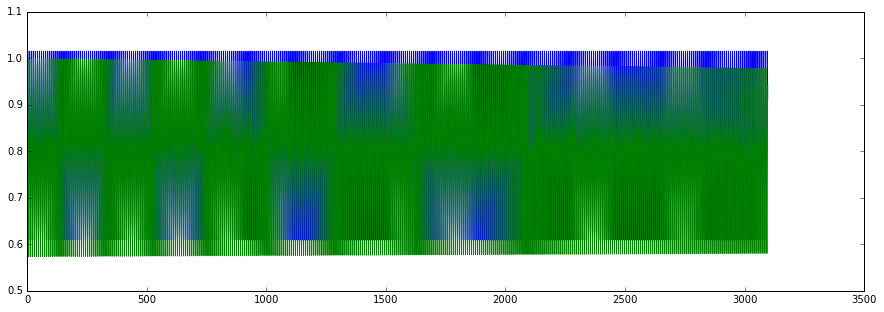

In [269]:
plt.figure(figsize=(15,5))
plt.plot(time_el,dhh_el2_fit,time_el,dhh_elec)
#plt.xlim(0.,100.)
print(pel_opt)

Same value for $\omega$ was obtained.